In [1]:
# imports
from importlib import reload

import os # a module to interact with the operating system
os.environ["ENDPOINT_URL"]="http://rook-ceph-rgw-nautiluss3.rook"
import numpy as np

import pandas as pd
import xarray
import h5py
import healpy as hp
import time

import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats as stats

from ulmo import io as ulmo_io
from ulmo import plotting
from ulmo.llc import io as llc_io
from ulmo.llc import plotting as llc_plotting

from ulmo.utils import image_utils
from ulmo.analysis import figures as ulmo_figs
from ulmo.plotting import plotting as ulmo_plotting
from ulmo.analysis import spatial_plots as sp

# Load years into table

1. Year 2012

In [2]:
# load table
os.getenv('ENDPOINT_URL') 
tbl_file = 's3://viirs/Tables/VIIRS_2012_std.parquet'
year_2012 = ulmo_io.load_main_table(tbl_file)

Read main table: s3://viirs/Tables/VIIRS_2012_std.parquet


In [3]:
year_2012.head()

,filename,row,col,lat,lon,clear_fraction,field_size,datetime,ex_filename,pp_file,pp_root,pp_idx,pp_type,mean_temperature,Tmin,Tmax,T90,T10,LL
0,s3://viirs/data/2012/032/20120201000000-OSPO-L...,5040,960,-0.111252,-156.94357,0.034370,192,2012-02-01,s3://viirs/Extractions/VIIRS_2012_95clear_192x...,s3://viirs/PreProc/VIIRS_2012_95clear_192x192_...,viirs_std,885541,0,25.274851,23.549988,27.100006,25.600006,24.989990,152.320679
1,s3://viirs/data/2012/032/20120201000000-OSPO-L...,5051,899,0.047520,-156.38885,0.049995,192,2012-02-01,s3://viirs/Extractions/VIIRS_2012_95clear_192x...,s3://viirs/PreProc/VIIRS_2012_95clear_192x192_...,viirs_std,529694,0,25.340801,23.549988,27.859985,25.769989,24.989990,98.993835
2,s3://viirs/data/2012/032/20120201000000-OSPO-L...,5089,921,0.267114,-156.62868,0.049778,192,2012-02-01,s3://viirs/Extractions/VIIRS_2012_95clear_192x...,s3://viirs/PreProc/VIIRS_2012_95clear_192x192_...,viirs_std,386280,0,25.321354,23.549988,27.279999,25.690002,25.000000,183.892456
3,s3://viirs/data/2012/032/20120201000000-OSPO-L...,5127,2346,-1.188727,-167.94283,0.049669,192,2012-02-01,s3://viirs/Extractions/VIIRS_2012_95clear_192x...,s3://viirs/PreProc/VIIRS_2012_95clear_192x192_...,viirs_std,5160,0,26.367399,24.450012,27.369995,26.709991,26.059998,254.753418
4,s3://viirs/data/2012/032/20120201000000-OSPO-L...,5136,960,0.514633,-157.08434,0.031331,192,2012-02-01,s3://viirs/Extractions/VIIRS_2012_95clear_192x...,s3://viirs/PreProc/VIIRS_2012_95clear_192x192_...,viirs_std,149633,0,25.346376,23.760010,27.350006,25.679993,25.049988,251.095093


In [4]:
# select only 99% clear
clear_2012 = year_2012 [ year_2012.clear_fraction < 0.01]
clear_2012.head()

,filename,row,col,lat,lon,clear_fraction,field_size,datetime,ex_filename,pp_file,pp_root,pp_idx,pp_type,mean_temperature,Tmin,Tmax,T90,T10,LL
33,s3://viirs/data/2012/032/20120201001000-OSPO-L...,3216,2496,21.009575,-175.17024,0.004693,192,2012-02-01 00:10:00,s3://viirs/Extractions/VIIRS_2012_95clear_192x...,s3://viirs/PreProc/VIIRS_2012_95clear_192x192_...,viirs_std,459126,0,26.149899,25.119995,26.790009,26.359985,25.950012,482.765015
34,s3://viirs/data/2012/032/20120201001000-OSPO-L...,3216,2592,20.876402,-175.80142,0.002740,192,2012-02-01 00:10:00,s3://viirs/Extractions/VIIRS_2012_95clear_192x...,s3://viirs/PreProc/VIIRS_2012_95clear_192x192_...,viirs_std,379958,0,26.039507,24.489990,26.889984,26.309998,25.829987,493.697144
35,s3://viirs/data/2012/032/20120201001000-OSPO-L...,3216,2688,20.725744,-176.50098,0.006565,192,2012-02-01 00:10:00,s3://viirs/Extractions/VIIRS_2012_95clear_192x...,s3://viirs/PreProc/VIIRS_2012_95clear_192x192_...,viirs_std,217941,0,25.925251,23.980011,27.029999,26.359985,25.609985,328.781921
40,s3://viirs/data/2012/032/20120201001000-OSPO-L...,3312,2496,21.622444,-175.36200,0.003906,192,2012-02-01 00:10:00,s3://viirs/Extractions/VIIRS_2012_95clear_192x...,s3://viirs/PreProc/VIIRS_2012_95clear_192x192_...,viirs_std,455088,0,26.135242,25.160004,27.149994,26.399994,25.920013,447.812378
48,s3://viirs/data/2012/032/20120201001000-OSPO-L...,3408,1920,23.276363,-170.16823,0.003988,192,2012-02-01 00:10:00,s3://viirs/Extractions/VIIRS_2012_95clear_192x...,s3://viirs/PreProc/VIIRS_2012_95clear_192x192_...,viirs_std,200120,0,26.035648,24.579987,27.320007,26.600006,25.359985,308.331177


2. Repeat for 2013

In [5]:
tbl_file = 's3://viirs/Tables/VIIRS_2013_std.parquet'
year_2013 = ulmo_io.load_main_table(tbl_file)
clear_2013 = year_2013 [ year_2013.clear_fraction < 0.01]
clear_2013.head()

Read main table: s3://viirs/Tables/VIIRS_2013_std.parquet


,filename,row,col,lat,lon,clear_fraction,field_size,datetime,ex_filename,pp_file,pp_root,pp_idx,pp_type,mean_temperature,Tmin,Tmax,T90,T10,LL
2,s3://viirs/data/2013/001/20130101001000-OSPO-L...,1104,2592,-54.629894,-165.56808,0.000190,192,2013-01-01 00:10:00,s3://viirs/Extractions/VIIRS_2013_95clear_192x...,s3://viirs/PreProc/VIIRS_2013_95clear_192x192_...,viirs_std,371103,0,6.957690,4.529999,7.730011,7.239990,6.720001,454.317627
16,s3://viirs/data/2013/001/20130101001000-OSPO-L...,2352,2880,-46.638560,-170.13945,0.002197,192,2013-01-01 00:10:00,s3://viirs/Extractions/VIIRS_2013_95clear_192x...,s3://viirs/PreProc/VIIRS_2013_95clear_192x192_...,viirs_std,525129,0,13.261623,11.869995,14.559998,13.920013,12.619995,328.187317
18,s3://viirs/data/2013/001/20130101001000-OSPO-L...,2448,2880,-46.021180,-170.18965,0.000109,192,2013-01-01 00:10:00,s3://viirs/Extractions/VIIRS_2013_95clear_192x...,s3://viirs/PreProc/VIIRS_2013_95clear_192x192_...,viirs_std,334879,0,13.768616,12.279999,14.869995,14.250000,13.179993,325.055908
46,s3://viirs/data/2013/001/20130101015000-OSPO-L...,816,2016,-61.191685,-179.64296,0.000244,192,2013-01-01 01:50:00,s3://viirs/Extractions/VIIRS_2013_95clear_192x...,s3://viirs/PreProc/VIIRS_2013_95clear_192x192_...,viirs_std,523131,0,4.227445,2.089996,6.029999,5.179993,3.500000,288.737183
73,s3://viirs/data/2013/001/20130101015000-OSPO-L...,2448,864,-48.444214,-169.82298,0.002523,192,2013-01-01 01:50:00,s3://viirs/Extractions/VIIRS_2013_95clear_192x...,s3://viirs/PreProc/VIIRS_2013_95clear_192x192_...,viirs_std,608794,0,12.521147,11.619995,13.639984,12.910004,12.109985,188.997009


3. Repeat for 2014

In [6]:
tbl_file = 's3://viirs/Tables/VIIRS_2014_std.parquet'
year_2014 = ulmo_io.load_main_table(tbl_file)
clear_2014 = year_2014 [ year_2014.clear_fraction < 0.01]
clear_2014.head()

Read main table: s3://viirs/Tables/VIIRS_2014_std.parquet


,filename,row,col,lat,lon,clear_fraction,field_size,datetime,ex_filename,pp_file,pp_root,pp_idx,pp_type,mean_temperature,Tmin,Tmax,T90,T10,LL
24,s3://viirs/data/2014/001/20140101010000-OSPO-L...,4944,2592,-70.541824,-177.95395,1.085069e-03,192,2014-01-01 01:00:00,s3://viirs/Extractions/VIIRS_2014_95clear_192x...,s3://viirs/PreProc/VIIRS_2014_95clear_192x192_...,viirs_std,371228,0,0.514469,-0.279999,1.119995,0.690002,0.320007,616.044922
29,s3://viirs/data/2014/001/20140101011000-OSPO-L...,1296,2880,-59.285510,176.07361,8.707682e-03,192,2014-01-01 01:10:00,s3://viirs/Extractions/VIIRS_2014_95clear_192x...,s3://viirs/PreProc/VIIRS_2014_95clear_192x192_...,viirs_std,776292,0,6.201693,3.950012,7.859985,7.140015,5.260010,129.760254
34,s3://viirs/data/2014/001/20140101011000-OSPO-L...,1392,2688,-58.686340,179.30411,-1.225871e-16,192,2014-01-01 01:10:00,s3://viirs/Extractions/VIIRS_2014_95clear_192x...,s3://viirs/PreProc/VIIRS_2014_95clear_192x192_...,viirs_std,945528,0,6.707335,5.549988,7.640015,7.109985,6.220001,201.896179
35,s3://viirs/data/2014/001/20140101011000-OSPO-L...,1392,2784,-58.688904,177.79907,-1.225871e-16,192,2014-01-01 01:10:00,s3://viirs/Extractions/VIIRS_2014_95clear_192x...,s3://viirs/PreProc/VIIRS_2014_95clear_192x192_...,viirs_std,830257,0,6.886670,5.549988,8.010010,7.470001,6.239990,172.286743
36,s3://viirs/data/2014/001/20140101011000-OSPO-L...,1392,2880,-58.670320,176.07718,1.627604e-04,192,2014-01-01 01:10:00,s3://viirs/Extractions/VIIRS_2014_95clear_192x...,s3://viirs/PreProc/VIIRS_2014_95clear_192x192_...,viirs_std,609955,0,6.945190,5.619995,8.010010,7.510010,6.450012,138.625000


4. Repeat for 2015

In [7]:
tbl_file = 's3://viirs/Tables/VIIRS_2015_std.parquet'
year_2015 = ulmo_io.load_main_table(tbl_file)
clear_2015 = year_2015 [ year_2015.clear_fraction < 0.01]
clear_2015.head()

Read main table: s3://viirs/Tables/VIIRS_2015_std.parquet


,filename,row,col,lat,lon,clear_fraction,field_size,datetime,ex_filename,pp_file,pp_root,pp_idx,pp_type,mean_temperature,Tmin,Tmax,T90,T10,LL
8,s3://viirs/data/2015/001/20150101003000-OSPO-L...,3216,2592,-49.387350,-169.66505,0.007460,192,2015-01-01 00:30:00,s3://viirs/Extractions/VIIRS_2015_95clear_192x...,s3://viirs/PreProc/VIIRS_2015_95clear_192x192_...,viirs_std,985027,0,11.742664,10.549988,12.470001,12.119995,11.359985,390.665771
12,s3://viirs/data/2015/001/20150101003000-OSPO-L...,3312,2592,-48.766290,-169.75137,0.000597,192,2015-01-01 00:30:00,s3://viirs/Extractions/VIIRS_2015_95clear_192x...,s3://viirs/PreProc/VIIRS_2015_95clear_192x192_...,viirs_std,632145,0,11.757071,10.369995,13.350006,12.410004,11.359985,59.049561
15,s3://viirs/data/2015/001/20150101003000-OSPO-L...,3408,2592,-48.145172,-169.84077,0.004801,192,2015-01-01 00:30:00,s3://viirs/Extractions/VIIRS_2015_95clear_192x...,s3://viirs/PreProc/VIIRS_2015_95clear_192x192_...,viirs_std,265697,0,12.386435,10.369995,13.600006,13.139984,11.450012,60.378845
17,s3://viirs/data/2015/001/20150101003000-OSPO-L...,3504,2592,-47.523850,-169.93019,0.004693,192,2015-01-01 00:30:00,s3://viirs/Extractions/VIIRS_2015_95clear_192x...,s3://viirs/PreProc/VIIRS_2015_95clear_192x192_...,viirs_std,497371,0,12.936785,10.980011,13.600006,13.149994,12.769989,356.519531
20,s3://viirs/data/2015/001/20150101003000-OSPO-L...,3600,2592,-46.902580,-170.01846,0.000570,192,2015-01-01 00:30:00,s3://viirs/Extractions/VIIRS_2015_95clear_192x...,s3://viirs/PreProc/VIIRS_2015_95clear_192x192_...,viirs_std,439228,0,12.978825,10.489990,13.619995,13.179993,12.820007,420.383728


5. Repeat for 2016

In [8]:
tbl_file = 's3://viirs/Tables/VIIRS_2016_std.parquet'
year_2016 = ulmo_io.load_main_table(tbl_file)
clear_2016 = year_2016 [ year_2016.clear_fraction < 0.01]
clear_2016.head()

Read main table: s3://viirs/Tables/VIIRS_2016_std.parquet


,filename,row,col,lat,lon,clear_fraction,field_size,datetime,ex_filename,pp_file,pp_root,pp_idx,pp_type,mean_temperature,Tmin,Tmax,T90,T10,LL
18,s3://viirs/data/2016/001/20160101000000-OSPO-L...,3216,480,23.369420,-154.403580,0.006727,192,2016-01-01 00:00:00,s3://viirs/Extractions/VIIRS_2016_95clear_192x...,s3://viirs/PreProc/VIIRS_2016_95clear_192x192_...,viirs_std,608918,0,24.958601,23.450012,25.820007,25.359985,24.500000,303.871460
49,s3://viirs/data/2016/001/20160101010000-OSPO-L...,144,2112,-34.853330,6.596800,0.008491,192,2016-01-01 01:00:00,s3://viirs/Extractions/VIIRS_2016_95clear_192x...,s3://viirs/PreProc/VIIRS_2016_95clear_192x192_...,viirs_std,619952,0,20.148514,18.109985,21.459991,20.730011,19.429993,122.899597
58,s3://viirs/data/2016/001/20160101010000-OSPO-L...,240,2304,-35.659770,8.340713,0.006944,192,2016-01-01 01:00:00,s3://viirs/Extractions/VIIRS_2016_95clear_192x...,s3://viirs/PreProc/VIIRS_2016_95clear_192x192_...,viirs_std,93761,0,19.964718,17.980011,20.940002,20.359985,19.540009,120.233093
73,s3://viirs/data/2016/001/20160101012000-OSPO-L...,4464,2592,-47.216160,175.798030,0.005425,192,2016-01-01 01:20:00,s3://viirs/Extractions/VIIRS_2016_95clear_192x...,s3://viirs/PreProc/VIIRS_2016_95clear_192x192_...,viirs_std,621961,0,11.739779,8.779999,13.089996,12.679993,10.760010,52.809875
80,s3://viirs/data/2016/001/20160101012000-OSPO-L...,4560,1440,-45.289803,-170.889200,0.005534,192,2016-01-01 01:20:00,s3://viirs/Extractions/VIIRS_2016_95clear_192x...,s3://viirs/PreProc/VIIRS_2016_95clear_192x192_...,viirs_std,824030,0,12.558064,11.850006,13.290009,12.869995,12.250000,410.039246


6. Repeat for 2017

In [9]:
tbl_file = 's3://viirs/Tables/VIIRS_2017_std.parquet'
year_2017 = ulmo_io.load_main_table(tbl_file)
clear_2017 = year_2017 [ year_2017.clear_fraction < 0.01]
clear_2017.head()

Read main table: s3://viirs/Tables/VIIRS_2017_std.parquet


,filename,row,col,lat,lon,clear_fraction,field_size,datetime,ex_filename,pp_file,pp_root,pp_idx,pp_type,mean_temperature,Tmin,Tmax,T90,T10,LL
22,s3://viirs/data/2017/001/20170101002000-OSPO-L...,2736,2208,-40.147415,-165.11365,0.008464,192,2017-01-01 00:20:00,s3://viirs/Extractions/VIIRS_2017_95clear_192x...,s3://viirs/PreProc/VIIRS_2017_95clear_192x192_...,viirs_std,778260,0,18.070223,17.239990,19.040009,18.519989,17.720001,353.265381
41,s3://viirs/data/2017/001/20170101003000-OSPO-L...,3216,96,0.660974,-156.30720,0.007731,192,2017-01-01 00:30:00,s3://viirs/Extractions/VIIRS_2017_95clear_192x...,s3://viirs/PreProc/VIIRS_2017_95clear_192x192_...,viirs_std,450348,0,25.949692,24.859985,26.720001,26.089996,25.809998,628.475220
54,s3://viirs/data/2017/001/20170101004000-OSPO-L...,1392,2112,21.373646,-178.12012,0.008952,192,2017-01-01 00:40:00,s3://viirs/Extractions/VIIRS_2017_95clear_192x...,s3://viirs/PreProc/VIIRS_2017_95clear_192x192_...,viirs_std,293506,0,25.797163,24.459991,26.559998,26.200012,25.500000,459.816101
60,s3://viirs/data/2017/001/20170101004000-OSPO-L...,1680,2016,23.409653,-177.69994,0.002116,192,2017-01-01 00:40:00,s3://viirs/Extractions/VIIRS_2017_95clear_192x...,s3://viirs/PreProc/VIIRS_2017_95clear_192x192_...,viirs_std,809700,0,24.986069,23.839996,25.790009,25.209991,24.799988,550.451111
80,s3://viirs/data/2017/001/20170101020000-OSPO-L...,2832,1728,-44.187300,176.14941,0.007378,192,2017-01-01 02:00:00,s3://viirs/Extractions/VIIRS_2017_95clear_192x...,s3://viirs/PreProc/VIIRS_2017_95clear_192x192_...,viirs_std,703467,0,14.429758,13.359985,16.059998,14.980011,13.760010,74.104248


7. Repeat for 2018

In [10]:
tbl_file = 's3://viirs/Tables/VIIRS_2018_std.parquet'
year_2018 = ulmo_io.load_main_table(tbl_file)
clear_2018 = year_2018 [ year_2018.clear_fraction < 0.01]
clear_2018.head()

Read main table: s3://viirs/Tables/VIIRS_2018_std.parquet


,filename,row,col,lat,lon,clear_fraction,field_size,datetime,ex_filename,pp_file,pp_root,pp_idx,pp_type,mean_temperature,Tmin,Tmax,T90,T10,LL
28,s3://viirs/data/2018/001/20180101003000-OSPO-L...,1200,1632,35.112793,20.420443,0.001383,192,2018-01-01 00:30:00,s3://viirs/Extractions/VIIRS_2018_95clear_192x...,s3://viirs/PreProc/VIIRS_2018_95clear_192x192_...,viirs_std,711643,0,17.118931,15.600006,17.799988,17.459991,16.679993,397.240967
39,s3://viirs/data/2018/001/20180101003000-OSPO-L...,1392,864,34.836033,12.883508,0.000787,192,2018-01-01 00:30:00,s3://viirs/Extractions/VIIRS_2018_95clear_192x...,s3://viirs/PreProc/VIIRS_2018_95clear_192x192_...,viirs_std,988562,0,17.199125,15.500000,18.420013,17.980011,16.649994,237.302002
43,s3://viirs/data/2018/001/20180101003000-OSPO-L...,1488,864,34.210155,12.745738,0.001139,192,2018-01-01 00:30:00,s3://viirs/Extractions/VIIRS_2018_95clear_192x...,s3://viirs/PreProc/VIIRS_2018_95clear_192x192_...,viirs_std,354241,0,17.554308,15.820007,18.489990,18.109985,16.970001,276.096313
44,s3://viirs/data/2018/001/20180101003000-OSPO-L...,1488,960,34.101826,13.739958,0.004557,192,2018-01-01 00:30:00,s3://viirs/Extractions/VIIRS_2018_95clear_192x...,s3://viirs/PreProc/VIIRS_2018_95clear_192x192_...,viirs_std,143428,0,18.001202,16.329987,19.329987,18.369995,17.290009,223.013733
47,s3://viirs/data/2018/001/20180101003000-OSPO-L...,1584,960,33.475727,13.595843,0.009359,192,2018-01-01 00:30:00,s3://viirs/Extractions/VIIRS_2018_95clear_192x...,s3://viirs/PreProc/VIIRS_2018_95clear_192x192_...,viirs_std,579623,0,18.079517,15.779999,19.329987,18.399994,17.850006,142.611572


8. Repeat for 2019

In [11]:
tbl_file = 's3://viirs/Tables/VIIRS_2019_std.parquet'
year_2019 = ulmo_io.load_main_table(tbl_file)
clear_2019 = year_2019 [ year_2019.clear_fraction < 0.01]
clear_2019.head()

Read main table: s3://viirs/Tables/VIIRS_2019_std.parquet


,filename,row,col,lat,lon,clear_fraction,field_size,datetime,ex_filename,pp_file,pp_root,pp_idx,pp_type,mean_temperature,Tmin,Tmax,T90,T10,LL
9,s3://viirs/data/2019/001/20190101000000-OSPO-L...,4272,864,-33.727590,7.050646,7.866753e-03,192,2019-01-01 00:00:00,s3://viirs/Extractions/VIIRS_2019_95clear_192x...,s3://viirs/PreProc/VIIRS_2019_95clear_192x192_...,viirs_std,1035023,0,20.738163,18.950012,21.609985,21.119995,20.380005,325.038147
10,s3://viirs/data/2019/001/20190101000000-OSPO-L...,4272,960,-33.930157,8.032587,-3.848601e-16,192,2019-01-01 00:00:00,s3://viirs/Extractions/VIIRS_2019_95clear_192x...,s3://viirs/PreProc/VIIRS_2019_95clear_192x192_...,viirs_std,1015732,0,20.526127,18.059998,21.399994,21.049988,20.070007,259.523865
24,s3://viirs/data/2019/001/20190101005000-OSPO-L...,2640,2208,20.397696,178.205080,2.983941e-03,192,2019-01-01 00:50:00,s3://viirs/Extractions/VIIRS_2019_95clear_192x...,s3://viirs/PreProc/VIIRS_2019_95clear_192x192_...,viirs_std,804528,0,26.618290,25.529999,27.559998,27.119995,26.040009,368.021362
30,s3://viirs/data/2019/001/20190101005000-OSPO-L...,2736,1824,21.628202,-178.556180,6.374783e-03,192,2019-01-01 00:50:00,s3://viirs/Extractions/VIIRS_2019_95clear_192x...,s3://viirs/PreProc/VIIRS_2019_95clear_192x192_...,viirs_std,890570,0,25.827900,24.850006,26.440002,26.170013,25.549988,432.149719
31,s3://viirs/data/2019/001/20190101005000-OSPO-L...,2736,1920,21.488472,-179.376220,2.170139e-04,192,2019-01-01 00:50:00,s3://viirs/Extractions/VIIRS_2019_95clear_192x...,s3://viirs/PreProc/VIIRS_2019_95clear_192x192_...,viirs_std,332745,0,26.067833,25.190002,26.630005,26.369995,25.750000,338.538147


9. Repeat for 2020

In [12]:
tbl_file = 's3://viirs/Tables/VIIRS_2020_std.parquet'
year_2020 = ulmo_io.load_main_table(tbl_file)
clear_2020 = year_2020 [ year_2020.clear_fraction < 0.01]
clear_2020.head()

Read main table: s3://viirs/Tables/VIIRS_2020_std.parquet


,filename,row,col,lat,lon,clear_fraction,field_size,datetime,ex_filename,pp_file,pp_root,pp_idx,pp_type,mean_temperature,Tmin,Tmax,T90,T10,LL
42,s3://viirs/data/2020/001/20200101001000-OSPO-L...,432,384,26.272058,-155.73773,8.138021e-03,192,2020-01-01 00:10:00,s3://viirs/Extractions/VIIRS_2020_95clear_192x...,s3://viirs/PreProc/VIIRS_2020_95clear_192x192_...,viirs_std,448193,0,23.546688,21.920013,24.350006,23.940002,23.160004,302.609741
63,s3://viirs/data/2020/001/20200101001000-OSPO-L...,816,960,28.246037,-161.55138,1.627604e-04,192,2020-01-01 00:10:00,s3://viirs/Extractions/VIIRS_2020_95clear_192x...,s3://viirs/PreProc/VIIRS_2020_95clear_192x192_...,viirs_std,715485,0,21.748489,20.350006,23.839996,22.429993,21.109985,-13.997253
66,s3://viirs/data/2020/001/20200101001000-OSPO-L...,912,864,28.978184,-160.75240,8.816189e-03,192,2020-01-01 00:10:00,s3://viirs/Extractions/VIIRS_2020_95clear_192x...,s3://viirs/PreProc/VIIRS_2020_95clear_192x192_...,viirs_std,322513,0,21.753899,20.459991,22.880005,22.510010,21.079987,155.724487
67,s3://viirs/data/2020/001/20200101001000-OSPO-L...,912,960,28.872751,-161.69067,1.162265e-15,192,2020-01-01 00:10:00,s3://viirs/Extractions/VIIRS_2020_95clear_192x...,s3://viirs/PreProc/VIIRS_2020_95clear_192x192_...,viirs_std,764375,0,21.378738,20.239990,22.619995,21.859985,20.799988,106.697876
73,s3://viirs/data/2020/001/20200101001000-OSPO-L...,1008,864,29.604937,-160.88632,1.085069e-04,192,2020-01-01 00:10:00,s3://viirs/Extractions/VIIRS_2020_95clear_192x...,s3://viirs/PreProc/VIIRS_2020_95clear_192x192_...,viirs_std,81004,0,21.464506,19.820007,22.690002,22.000000,20.859985,142.454895


In [13]:
viirs_tbl = pd.concat([clear_2012, clear_2013, clear_2014, clear_2015, clear_2016, clear_2017, clear_2018, clear_2019, clear_2020], ignore_index=True)

In [14]:
viirs_tbl.shape

(2291591, 19)

# Functions

In [15]:
def show_spatial_two_avg(tbl1:pd.DataFrame, tbl2:pd.DataFrame, 
                 nside=64, use_log=True, 
                 use_mask=True, tricontour=False,
                 lbl=None, figsize=(12,8), 
                 color='coolwarm', show=True):
    """Generate a global map of the location of the input
    cutouts

    Args:
        main_tbl (pandas.DataFrame): table of cutouts
        nside (int, optional): [description]. Defaults to 64.
        use_log (bool, optional): [description]. Defaults to True.
        use_mask (bool, optional): [description]. Defaults to True.
        tricontour (bool, optional): [description]. Defaults to False.
        lbl ([type], optional): [description]. Defaults to None.
        figsize (tuple, optional): [description]. Defaults to (12,8).
        color (str, optional): [description]. Defaults to 'Reds'.
        show (bool, optional): If True, show on the screen.  Defaults to True

    Returns:
        matplotlib.Axis: axis holding the plot
    """
    # Healpix me
    hp_events1, hp_lons1, hp_lats1, hp_values1 = sp.evals_to_healpix(
        tbl1, nside, log=use_log, mask=use_mask)
    
    hp_events2, hp_lons2, hp_lats2, hp_values2 = sp.evals_to_healpix(
        tbl2, nside, log=use_log, mask=use_mask)
    
    # Figure
    
    fig = plt.figure(figsize=figsize)
    plt.clf()

    tformM = ccrs.Mollweide()
    tformP = ccrs.PlateCarree()

    ax = plt.axes(projection=tformM)

    if tricontour:
        cm = plt.get_cmap(color)
        img = ax.tricontourf(hp_lons1, hp_lats1, hp_values1 - hp_values2, transform=tformM,
                         levels=20, cmap=cm)#, zorder=10)
    else:
        cm = plt.get_cmap(color)
        # Cut
        good = np.invert(hp_values2.mask)
        img = plt.scatter(x=hp_lons2[good],
            y=hp_lats2[good],
            c=hp_values1[good]- hp_values2[good], vmin = -300, vmax = 300, 
            cmap=cm,
            s=1,
            transform=tformP)

    # Colorbar
    cb = plt.colorbar(img, orientation='horizontal', pad=0.)
    if lbl is not None:
        #clbl=r'$\log_{10} \, N_{\rm '+'{}'.format(lbl)+'}$'
        clbl = 'diff_mean_LL'
        cb.set_label(clbl, fontsize=20.)
    cb.ax.tick_params(labelsize=17)

    # Coast lines
    if not tricontour:
        ax.coastlines(zorder=10)
        ax.set_global()
    
        gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=1, 
            color='black', alpha=0.5, linestyle=':', draw_labels=True)
        gl.xlabels_top = False
        gl.ylabels_left = True
        gl.ylabels_right=False
        gl.xlines = True
        gl.xformatter = LONGITUDE_FORMATTER
        gl.yformatter = LATITUDE_FORMATTER
        gl.xlabel_style = {'color': 'black'}# 'weight': 'bold'}
        gl.ylabel_style = {'color': 'black'}# 'weight': 'bold'}
        #gl.xlocator = mticker.FixedLocator([-180., -160, -140, -120, -60, -20.])
        #gl.xlocator = mticker.FixedLocator([-240., -180., -120, -65, -60, -55, 0, 60, 120.])
        #gl.ylocator = mticker.FixedLocator([0., 15., 30., 45, 60.])


    # Layout and save
    if show:
        plt.show()

    return ax

In [23]:
def show_spatial_two_med(tbl1:pd.DataFrame, tbl2:pd.DataFrame, 
                 nside=64, 
                 use_mask=True, tricontour=False,
                 lbl=None, figsize=(12,8), 
                 color='coolwarm', show=True):
    """Generate a global map of the location of the input
    cutouts

    Args:
        main_tbl (pandas.DataFrame): table of cutouts
        nside (int, optional): [description]. Defaults to 64.
        use_log (bool, optional): [description]. Defaults to True.
        use_mask (bool, optional): [description]. Defaults to True.
        tricontour (bool, optional): [description]. Defaults to False.
        lbl ([type], optional): [description]. Defaults to None.
        figsize (tuple, optional): [description]. Defaults to (12,8).
        color (str, optional): [description]. Defaults to 'Reds'.
        show (bool, optional): If True, show on the screen.  Defaults to True

    Returns:
        matplotlib.Axis: axis holding the plot
    """
    # Healpix me
    hp_events1, hp_lons1, hp_lats1, hp_values1 = sp.evals_to_healpix_meds(
        tbl1, nside, mask=use_mask)
    
    hp_events2, hp_lons2, hp_lats2, hp_values2 = sp.evals_to_healpix_meds(
        tbl2, nside, mask=use_mask)
    
    # Figure
    
    fig = plt.figure(figsize=figsize)
    plt.clf()

    tformM = ccrs.Mollweide()
    tformP = ccrs.PlateCarree()

    ax = plt.axes(projection=tformM)

    if tricontour:
        cm = plt.get_cmap(color)
        img = ax.tricontourf(hp_lons1, hp_lats1, hp_values1 - hp_values2, transform=tformM,
                         levels=20, cmap=cm)#, zorder=10)
    else:
        cm = plt.get_cmap(color)
        # Cut
        good = np.invert(hp_values2.mask)
        img = plt.scatter(x=hp_lons2[good],
            y=hp_lats2[good],
            c=hp_values1[good]- hp_values2[good], vmin = -300, vmax = 300, 
            cmap=cm,
            s=1,
            transform=tformP)

    # Colorbar
    cb = plt.colorbar(img, orientation='horizontal', pad=0.)
    if lbl is not None:
        #clbl=r'$\log_{10} \, N_{\rm '+'{}'.format(lbl)+'}$'
        clbl = 'diff_mean_LL'
        cb.set_label(clbl, fontsize=20.)
    cb.ax.tick_params(labelsize=17)

    # Coast lines
    if not tricontour:
        ax.coastlines(zorder=10)
        ax.set_global()
    
        gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=1, 
            color='black', alpha=0.5, linestyle=':', draw_labels=True)
        gl.xlabels_top = False
        gl.ylabels_left = True
        gl.ylabels_right=False
        gl.xlines = True
        gl.xformatter = LONGITUDE_FORMATTER
        gl.yformatter = LATITUDE_FORMATTER
        gl.xlabel_style = {'color': 'black'}# 'weight': 'bold'}
        gl.ylabel_style = {'color': 'black'}# 'weight': 'bold'}
        #gl.xlocator = mticker.FixedLocator([-180., -160, -140, -120, -60, -20.])
        #gl.xlocator = mticker.FixedLocator([-240., -180., -120, -65, -60, -55, 0, 60, 120.])
        #gl.ylocator = mticker.FixedLocator([0., 15., 30., 45, 60.])


    # Layout and save
    if show:
        plt.show()

    return ax

In [17]:
def scatter_diff_avg(tbl1:pd.DataFrame, tbl2:pd.DataFrame, 
                 nside=32, use_log=False, 
                 use_mask=True, tricontour=False,
                 lbl=None, figsize=(12,8), 
                 color='plasma', show=True):
    """Generate a scatter plot with the difference of mean LL between two
    dataframes (pixel-wise) as a function of the number of cutouts

    Args:
        main_tbl (pandas.DataFrame): table of cutouts
        nside (int, optional): [description]. Defaults to 64.
        use_log (bool, optional): [description]. Defaults to True.
        use_mask (bool, optional): [description]. Defaults to True.
        tricontour (bool, optional): [description]. Defaults to False.
        lbl ([type], optional): [description]. Defaults to None.
        figsize (tuple, optional): [description]. Defaults to (12,8).
        color (str, optional): [description]. Defaults to 'Reds'.
        show (bool, optional): If True, show on the screen.  Defaults to True

    Returns:
        matplotlib.Axis: axis holding the plot
    """
    # Healpix me
    hp_events1, hp_lons1, hp_lats1, hp_values1 = sp.evals_to_healpix(
        tbl1, nside, log=use_log, mask=use_mask)
    
    hp_events2, hp_lons2, hp_lats2, hp_values2 = sp.evals_to_healpix(
        tbl2, nside, log=use_log, mask=use_mask)
    
    # Figure
    
    fig = plt.figure(figsize=figsize)
    plt.clf()
    cm = plt.get_cmap(color)
        
    # Cut
    good = np.invert(hp_values2.mask)
    ax = plt.scatter(x= hp_events2[good] , y = hp_values1[good]- hp_values2[good], s=1)

    # Colorbar
    #cb = plt.colorbar(ax, orientation='vertical', pad=0.1)
    #if lbl is not None:
        #clbl=r'$\log_{10} \, N_{\rm '+'{}'.format(lbl)+'}$'
    #    clbl = 'diff_mean_LL'
    #    cb.set_label(clbl, fontsize=20.)
    #cb.ax.tick_params(labelsize=17)

    # Axis Labels
    plt.xlabel('num of cutouts : table 2')
    plt.ylabel('diff_mean_LL')
    plt.ylim(-1000, 1000)


    # Layout and save
    if show:
        plt.show()

    return ax

In [26]:
def scatter_diff_med(tbl1:pd.DataFrame, tbl2:pd.DataFrame, 
                 nside=32,  
                 use_mask=True, tricontour=False,
                 lbl=None, figsize=(12,8), 
                 color='plasma', show=True):
    """Generate a scatter plot with the difference of mean LL between two
    dataframes (pixel-wise) as a function of the number of cutouts

    Args:
        main_tbl (pandas.DataFrame): table of cutouts
        nside (int, optional): [description]. Defaults to 64.
        use_log (bool, optional): [description]. Defaults to True.
        use_mask (bool, optional): [description]. Defaults to True.
        tricontour (bool, optional): [description]. Defaults to False.
        lbl ([type], optional): [description]. Defaults to None.
        figsize (tuple, optional): [description]. Defaults to (12,8).
        color (str, optional): [description]. Defaults to 'Reds'.
        show (bool, optional): If True, show on the screen.  Defaults to True

    Returns:
        matplotlib.Axis: axis holding the plot
    """
    # Healpix me
    hp_events1, hp_lons1, hp_lats1, hp_values1 = sp.evals_to_healpix_meds(
        tbl1, nside, mask=use_mask)
    
    hp_events2, hp_lons2, hp_lats2, hp_values2 = sp.evals_to_healpix_meds(
        tbl2, nside, mask=use_mask)
    
    # Figure
    
    fig = plt.figure(figsize=figsize)
    plt.clf()
    cm = plt.get_cmap(color)
        
    # Cut
    good = np.invert(hp_values2.mask)
    ax = plt.scatter(x= hp_events2[good] , y = hp_values1[good]- hp_values2[good], s=1)

    # Colorbar
    #cb = plt.colorbar(ax, orientation='vertical', pad=0.1)
    #if lbl is not None:
        #clbl=r'$\log_{10} \, N_{\rm '+'{}'.format(lbl)+'}$'
    #    clbl = 'diff_mean_LL'
    #    cb.set_label(clbl, fontsize=20.)
    #cb.ax.tick_params(labelsize=17)

    # Axis Labels
    plt.xlabel('num of cutouts : table 2')
    plt.ylabel('diff_mean_LL')
    plt.ylim(-1000, 1000)


    # Layout and save
    if show:
        plt.show()

    return ax

# Check for a temporal trend

## 2012 to 2015

In [18]:
viirs_head = viirs_tbl[ (viirs_tbl.datetime.dt.year > 2011) & (viirs_tbl.datetime.dt.year < 2015) ]
viirs_head.shape

(738358, 19)

## 2018 to 2020

In [19]:
viirs_tail = viirs_tbl[ (viirs_tbl.datetime.dt.year > 2017) & (viirs_tbl.datetime.dt.year < 2021) ]
viirs_tail.shape

(801446, 19)

### Show avg LL 

/opt/conda/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:324: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/opt/conda/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:348: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '
/opt/conda/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:360: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


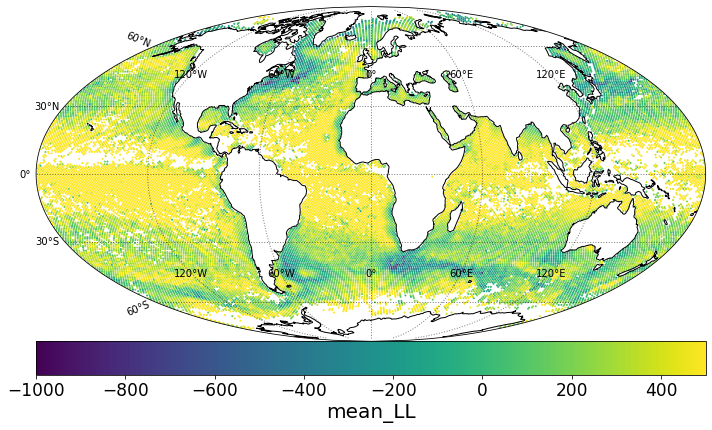

In [20]:
_ = sp.show_med_LL(viirs_head, lbl = True)

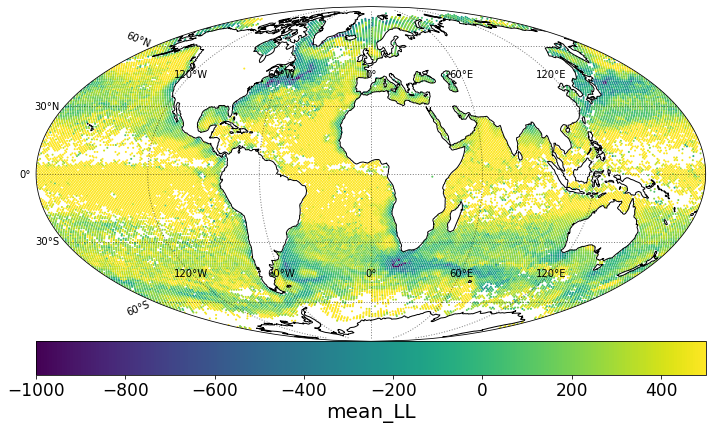

In [21]:
_ = sp.show_med_LL(viirs_tail, lbl = True)

### Show diff in avg LL

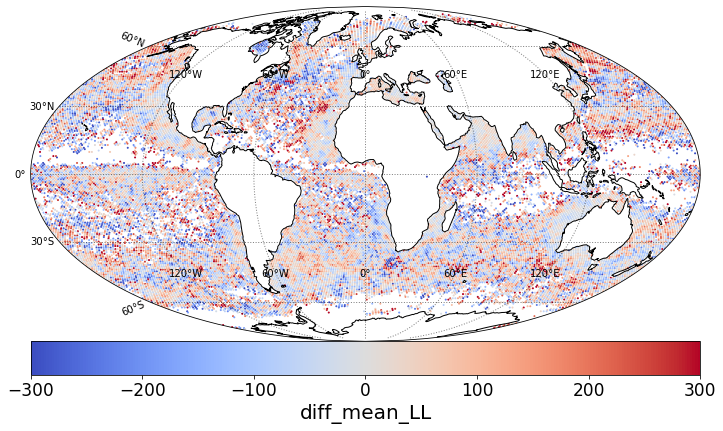

<GeoAxesSubplot:>

In [24]:
show_spatial_two_med(viirs_tail, viirs_head, lbl=True)

## Scatter diff

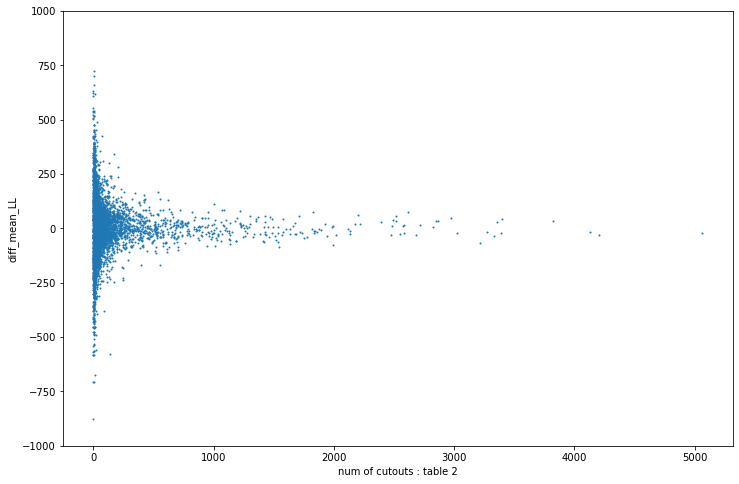

In [27]:
scatter_diff_med(viirs_tail, viirs_head, lbl = True)

In [112]:
NSIDE = 32
print("Approximate resolution at NSIDE {} is {:.2} deg".format(NSIDE, hp.nside2resol(NSIDE, arcmin=True) / 60))

Approximate resolution at NSIDE 32 is 1.8 deg


In [87]:
NPIX = hp.nside2npix(NSIDE)
print(NPIX)

12288


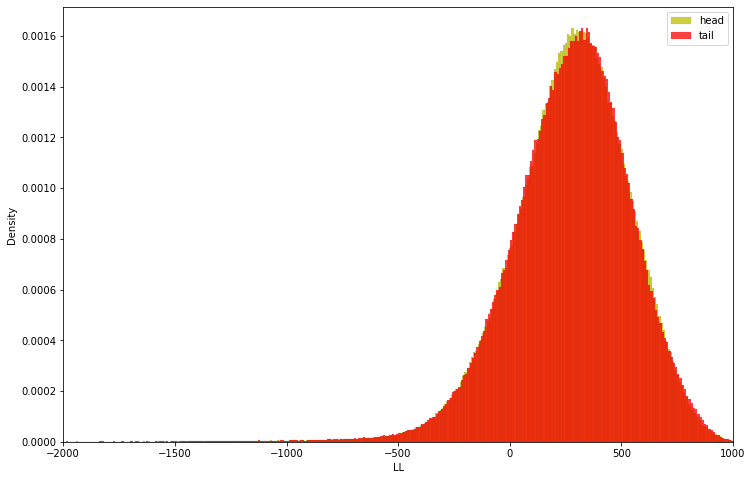

In [40]:
fig = plt.figure(figsize=(12,8))
ax = plt.gca()
_ = sns.histplot(viirs_tail, x='LL', ax=ax, binwidth = 10, color = 'y', stat ='density', label = 'head')
_ = sns.histplot(viirs_head, x='LL', ax=ax, binwidth = 10, color = 'r', stat ='density', label = 'tail')
ax.set_xlim(-2000., 1000.)
ax.legend()

# VIIRS: all years vs LLC (no noise)

### Load table

In [28]:
tbl_file = 's3://llc/Tables/test_uniform_r0.5_test.feather'
llc_tbl = ulmo_io.load_main_table( tbl_file )

Read main table: s3://llc/Tables/test_uniform_r0.5_test.feather


### Diff in mean LL

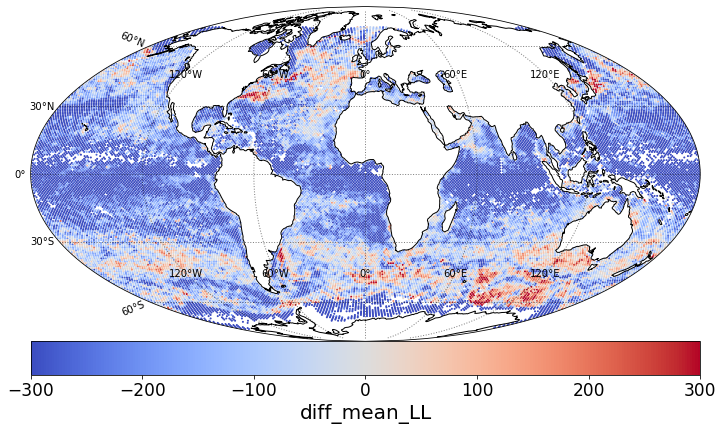

<GeoAxesSubplot:>

In [29]:
show_spatial_two_med(viirs_tbl, llc_tbl, lbl=True)